In [1]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import pynocular as pn

In [2]:
# Generate some test data
p = pn.PointData()
p['x'] = np.linspace(0, 1, 100)
p['y'] = np.random.rand(100)
p['a'] = p['x'] ** 2 * p['y']

In [3]:
p

x,0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.3,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.4,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.6,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.7,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.8,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1
y,0.53,0.36,0.15,0.2,0.27,0.52,0.48,0.98,0.41,0.62,0.87,0.19,0.85,0.2,0.26,0.58,0.01,0.74,0.45,0.43,0.41,0,0.22,0.92,0.23,0.14,0.49,0.63,0.91,0.77,0.86,0.8,0.15,0.03,0.12,0.28,0.96,0.89,0.57,0.28,0.51,0.21,0.58,0.19,0.2,0.86,0.78,0.66,0.67,0.29,0.19,0.11,0.92,0.49,0.98,0.35,0.95,0.17,0.54,0.55,0.63,0.51,0.73,0.04,0.6,0.7,0.58,0.5,0.55,0.55,0.32,0.72,0.3,0.93,0.28,0.55,0.86,0.21,0.89,0.26,0.11,0.3,0.2,0.88,0.39,0.64,0.97,0.03,0.03,0.99,0.99,0.33,0.94,0.83,0.51,0.34,0.79,0.25,0.17,0.53
a,0,0,0,0,0,0,0,0,0,0.01,0.01,0,0.01,0,0.01,0.01,0,0.02,0.02,0.02,0.02,0,0.01,0.05,0.01,0.01,0.03,0.05,0.07,0.07,0.08,0.08,0.02,0,0.01,0.04,0.13,0.12,0.08,0.04,0.08,0.04,0.1,0.04,0.04,0.18,0.17,0.15,0.16,0.07,0.05,0.03,0.25,0.14,0.29,0.11,0.3,0.06,0.19,0.2,0.23,0.19,0.28,0.02,0.25,0.3,0.26,0.23,0.26,0.27,0.16,0.37,0.16,0.51,0.16,0.32,0.51,0.13,0.55,0.17,0.07,0.2,0.14,0.62,0.28,0.47,0.73,0.03,0.02,0.8,0.82,0.28,0.81,0.73,0.46,0.31,0.74,0.24,0.17,0.53


In [4]:
p['a']

a,0,0,0,0,0,0,0,0,0,0.01,0.01,0,0.01,0,0.01,0.01,0,0.02,0.02,0.02,0.02,0,0.01,0.05,0.01,0.01,0.03,0.05,0.07,0.07,0.08,0.08,0.02,0,0.01,0.04,0.13,0.12,0.08,0.04,0.08,0.04,0.1,0.04,0.04,0.18,0.17,0.15,0.16,0.07,0.05,0.03,0.25,0.14,0.29,0.11,0.3,0.06,0.19,0.2,0.23,0.19,0.28,0.02,0.25,0.3,0.26,0.23,0.26,0.27,0.16,0.37,0.16,0.51,0.16,0.32,0.51,0.13,0.55,0.17,0.07,0.2,0.14,0.62,0.28,0.47,0.73,0.03,0.02,0.8,0.82,0.28,0.81,0.73,0.46,0.31,0.74,0.24,0.17,0.53


In [5]:
np.array(p['a'])

array([0.00000000e+00, 3.67668357e-05, 6.00527994e-05, 1.85080831e-04,
       4.34921558e-04, 1.31864210e-03, 1.75774867e-03, 4.90342370e-03,
       2.68603938e-03, 5.11980252e-03, 8.89254509e-03, 2.34611964e-03,
       1.24255310e-02, 3.47333372e-03, 5.12685605e-03, 1.33927389e-02,
       3.29206977e-04, 2.17596952e-02, 1.50313138e-02, 1.60078062e-02,
       1.65590683e-02, 2.16370039e-04, 1.10911741e-02, 4.98801138e-02,
       1.32664517e-02, 8.72628080e-03, 3.40334424e-02, 4.69027213e-02,
       7.25698991e-02, 6.59753748e-02, 7.85285480e-02, 7.82521303e-02,
       1.58478485e-02, 3.03896288e-03, 1.40074007e-02, 3.50115314e-02,
       1.27583055e-01, 1.24897744e-01, 8.45156576e-02, 4.37020654e-02,
       8.40558550e-02, 3.64129222e-02, 1.03626935e-01, 3.62160641e-02,
       3.96172280e-02, 1.77013100e-01, 1.68291281e-01, 1.47650527e-01,
       1.58459481e-01, 7.20918887e-02, 4.89021297e-02, 2.84734691e-02,
       2.52837109e-01, 1.39847878e-01, 2.92558942e-01, 1.07066411e-01,
      

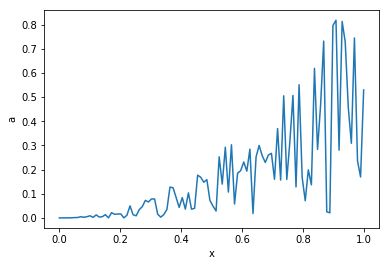

In [6]:
# let's make a simple plot
p.plot('x', 'a')

In [7]:
# different pointdata
p2 = pn.PointData(x=np.random.rand(100))

In [8]:
p2

x,0.25,0.42,0.34,0.01,0.23,0.99,0.03,0.9,0.46,0.9,0.44,0.58,0.93,0.7,0.45,0.94,0.23,0.83,0.79,0.79,0.49,0.03,0.78,0.96,0.07,0.49,0.69,0.04,0.83,0.76,0.18,0.3,0.62,0.64,0.46,0.6,0.8,0.86,0.58,0.51,0.7,0.13,0.46,0.36,0.36,0.68,0.16,0.8,0.74,0.57,0.68,0.35,0.87,0.67,0.06,0.98,0.95,0.94,0.29,0.11,0.57,0.38,0.35,0.16,0.58,0.65,0.96,0.88,0.22,0.53,0.22,0.33,0.5,0.85,0.72,0.06,0.49,0.53,0.34,0.33,0.64,0.06,0.53,0.5,0.45,0.49,0.27,0.44,0.12,0.23,0.74,0.32,0.03,0.35,0.62,0.58,0.89,0.49,0.34,0.53


In [9]:
p.interp(p2)

x,0.25,0.42,0.34,0.01,0.23,0.99,0.03,0.9,0.46,0.9,0.44,0.58,0.93,0.7,0.45,0.94,0.23,0.83,0.79,0.79,0.49,0.03,0.78,0.96,0.07,0.49,0.69,0.04,0.83,0.76,0.18,0.3,0.62,0.64,0.46,0.6,0.8,0.86,0.58,0.51,0.7,0.13,0.46,0.36,0.36,0.68,0.16,0.8,0.74,0.57,0.68,0.35,0.87,0.67,0.06,0.98,0.95,0.94,0.29,0.11,0.57,0.38,0.35,0.16,0.58,0.65,0.96,0.88,0.22,0.53,0.22,0.33,0.5,0.85,0.72,0.06,0.49,0.53,0.34,0.33,0.64,0.06,0.53,0.5,0.45,0.49,0.27,0.44,0.12,0.23,0.74,0.32,0.03,0.35,0.62,0.58,0.89,0.49,0.34,0.53
y,0.11,0.34,0.12,0.26,0.88,0.23,0.21,0.81,0.89,1.15,0.16,0.22,0.92,0.36,0.23,0.8,0.85,0.54,0.89,0.65,0.34,0.21,0.29,0.31,0.77,0.66,0.59,0.35,0.39,0.75,0.57,0.77,0.61,0.07,0.89,0.56,0.44,0.49,0.48,0.05,0.53,0.09,0.9,0.99,0.38,0.5,0.01,0.07,0.46,0.85,0.5,0.19,0.95,0.56,0.44,0.2,0.33,0.67,0.81,0.19,0.36,0.85,0.15,0.19,0.16,0.74,0.33,-0.14,0.03,0.49,-0.02,0.01,0.26,0.4,0.69,0.7,0.46,0.63,0.08,0.06,0.04,0.71,0.75,0.25,0.78,0.62,0.56,0.2,0.85,0.87,0.91,0.17,0.19,0.13,0.6,0.16,0.04,0.65,0.05,0.91
a,0.01,0.06,0.01,0,0.05,0.22,0,0.66,0.18,0.93,0.03,0.08,0.8,0.17,0.05,0.71,0.05,0.38,0.55,0.41,0.08,0,0.18,0.28,0,0.16,0.28,0,0.27,0.44,0.02,0.07,0.24,0.03,0.18,0.2,0.27,0.36,0.17,0.01,0.26,0,0.19,0.13,0.05,0.23,0,0.04,0.25,0.27,0.23,0.02,0.72,0.25,0,0.19,0.3,0.6,0.07,0,0.12,0.12,0.02,0,0.05,0.31,0.3,-0.11,0,0.14,-0,0,0.06,0.29,0.36,0,0.11,0.17,0.01,0.01,0.02,0,0.21,0.06,0.16,0.15,0.04,0.04,0.01,0.05,0.49,0.02,0,0.01,0.23,0.06,0.03,0.15,0.01,0.25


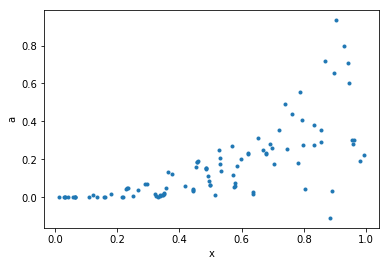

In [10]:
p.interp(p2).plot('x', 'a', '.')

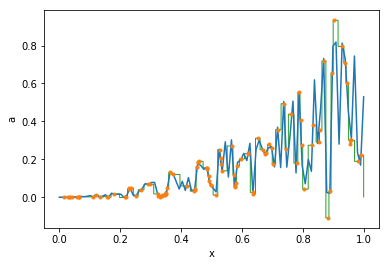

In [11]:
p.plot('x', 'a')
p2.plot('x', 'a', '.')
p2.interp(x=np.linspace(0,1,1000), method='nearest').plot('a')

In [12]:
p.interp(p2)

x,0.25,0.42,0.34,0.01,0.23,0.99,0.03,0.9,0.46,0.9,0.44,0.58,0.93,0.7,0.45,0.94,0.23,0.83,0.79,0.79,0.49,0.03,0.78,0.96,0.07,0.49,0.69,0.04,0.83,0.76,0.18,0.3,0.62,0.64,0.46,0.6,0.8,0.86,0.58,0.51,0.7,0.13,0.46,0.36,0.36,0.68,0.16,0.8,0.74,0.57,0.68,0.35,0.87,0.67,0.06,0.98,0.95,0.94,0.29,0.11,0.57,0.38,0.35,0.16,0.58,0.65,0.96,0.88,0.22,0.53,0.22,0.33,0.5,0.85,0.72,0.06,0.49,0.53,0.34,0.33,0.64,0.06,0.53,0.5,0.45,0.49,0.27,0.44,0.12,0.23,0.74,0.32,0.03,0.35,0.62,0.58,0.89,0.49,0.34,0.53
y,0.11,0.34,0.12,0.26,0.88,0.23,0.21,0.81,0.89,1.15,0.16,0.22,0.92,0.36,0.23,0.8,0.85,0.54,0.89,0.65,0.34,0.21,0.29,0.31,0.77,0.66,0.59,0.35,0.39,0.75,0.57,0.77,0.61,0.07,0.89,0.56,0.44,0.49,0.48,0.05,0.53,0.09,0.9,0.99,0.38,0.5,0.01,0.07,0.46,0.85,0.5,0.19,0.95,0.56,0.44,0.2,0.33,0.67,0.81,0.19,0.36,0.85,0.15,0.19,0.16,0.74,0.33,-0.14,0.03,0.49,-0.02,0.01,0.26,0.4,0.69,0.7,0.46,0.63,0.08,0.06,0.04,0.71,0.75,0.25,0.78,0.62,0.56,0.2,0.85,0.87,0.91,0.17,0.19,0.13,0.6,0.16,0.04,0.65,0.05,0.91
a,0.01,0.06,0.01,0,0.05,0.22,0,0.66,0.18,0.93,0.03,0.08,0.8,0.17,0.05,0.71,0.05,0.38,0.55,0.41,0.08,0,0.18,0.28,0,0.16,0.28,0,0.27,0.44,0.02,0.07,0.24,0.03,0.18,0.2,0.27,0.36,0.17,0.01,0.26,0,0.19,0.13,0.05,0.23,0,0.04,0.25,0.27,0.23,0.02,0.72,0.25,0,0.19,0.3,0.6,0.07,0,0.12,0.12,0.02,0,0.05,0.31,0.3,-0.11,0,0.14,-0,0,0.06,0.29,0.36,0,0.11,0.17,0.01,0.01,0.02,0,0.21,0.06,0.16,0.15,0.04,0.04,0.01,0.05,0.49,0.02,0,0.01,0.23,0.06,0.03,0.15,0.01,0.25


get item 0
get item 0
get item 0
get item 0


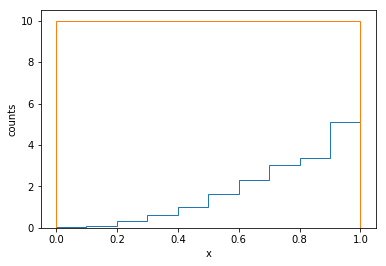

In [13]:
# Generate a histogram function for histograms with weight 'a'
g = p.histogram('x')
g.plot('a')
g.plot('counts')

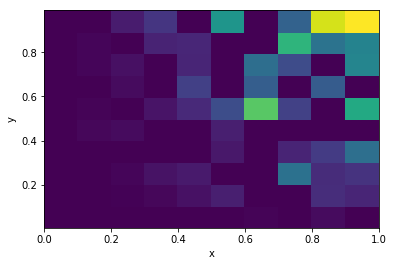

In [14]:
gn = p.histogram('x', 'y')
gn.plot('a')

In [15]:
gn['a']

y \ x,"[0.00, 0.10]","[0.10, 0.20]","[0.20, 0.30]","[0.30, 0.40]","[0.40, 0.50]","[0.50, 0.60]","[0.60, 0.70]","[0.70, 0.80]","[0.80, 0.90]","[0.90, 1.00]"
"[0.00, 0.10]",0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.05,0.00
"[0.10, 0.20]",0.00,0.01,0.01,0.03,0.08,0.14,0.00,0.00,0.21,0.17
"[0.20, 0.30]",0.00,0.01,0.02,0.08,0.11,0.00,0.00,0.61,0.20,0.24
"[0.30, 0.40]",0.00,0.00,0.00,0.00,0.00,0.11,0.00,0.16,0.28,0.59
"[0.40, 0.50]",0.00,0.03,0.05,0.00,0.00,0.14,0.00,0.00,0.00,0.00
"[0.50, 0.60]",0.00,0.01,0.00,0.08,0.19,0.38,1.21,0.32,0.00,0.99
"[0.60, 0.69]",0.01,0.00,0.05,0.00,0.31,0.00,0.48,0.00,0.47,0.00
"[0.69, 0.79]",0.00,0.02,0.07,0.00,0.17,0.00,0.58,0.37,0.00,0.74
"[0.79, 0.89]",0.00,0.02,0.00,0.16,0.18,0.00,0.00,1.06,0.62,0.73
"[0.89, 0.99]",0.00,0.00,0.12,0.25,0.00,0.85,0.00,0.51,1.53,1.63


In [16]:
np.sum(gn['a'], axis='y')

x,"[0.00, 0.10]","[0.10, 0.20]","[0.20, 0.30]","[0.30, 0.40]","[0.40, 0.50]","[0.50, 0.60]","[0.60, 0.70]","[0.70, 0.80]","[0.80, 0.90]","[0.90, 1.00]"
a,0.02,0.10,0.32,0.61,1.02,1.61,2.29,3.02,3.35,5.09


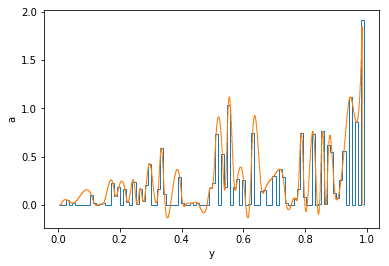

In [17]:
p.histogram(y=100).plot('a')
p.binwise(y=100, function=np.sum, fill_value=np.nan).interp(y=1000, method='cubic').plot('a')

get item 0
get item 0


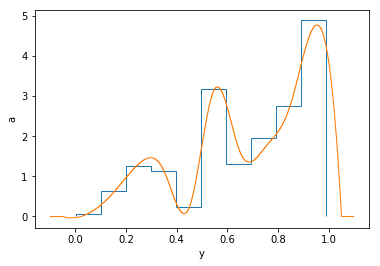

In [18]:
p.histogram('y').plot('a')
p.binwise(y=np.linspace(-0.1,1.1,13)).interp(y=1000).plot('a')

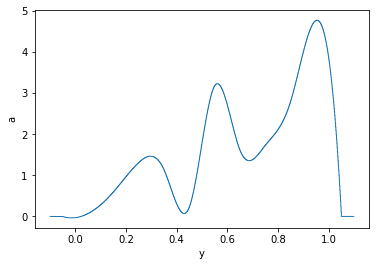

In [19]:
p.binwise(y=np.linspace(-0.1,1.1,13)).interp(y=1000, method='cubic').plot('a')

In [20]:
g = p.histogram(x=10)

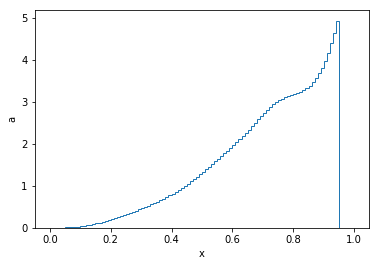

In [21]:
g.interp(x=100).plot('a')

In [22]:
g.interp(x=100)

x,"[0.00, 0.01]","[0.01, 0.02]","[0.02, 0.03]","[0.03, 0.04]","[0.04, 0.05]","[0.05, 0.06]","[0.06, 0.07]","[0.07, 0.08]","[0.08, 0.09]","[0.09, 0.10]","[0.10, 0.11]","[0.11, 0.12]","[0.12, 0.13]","[0.13, 0.14]","[0.14, 0.15]","[0.15, 0.16]","[0.16, 0.17]","[0.17, 0.18]","[0.18, 0.19]","[0.19, 0.20]","[0.20, 0.21]","[0.21, 0.22]","[0.22, 0.23]","[0.23, 0.24]","[0.24, 0.25]","[0.25, 0.26]","[0.26, 0.27]","[0.27, 0.28]","[0.28, 0.29]","[0.29, 0.30]","[0.30, 0.31]","[0.31, 0.32]","[0.32, 0.33]","[0.33, 0.34]","[0.34, 0.35]","[0.35, 0.36]","[0.36, 0.37]","[0.37, 0.38]","[0.38, 0.39]","[0.39, 0.40]","[0.40, 0.41]","[0.41, 0.42]","[0.42, 0.43]","[0.43, 0.44]","[0.44, 0.45]","[0.45, 0.46]","[0.46, 0.47]","[0.47, 0.48]","[0.48, 0.49]","[0.49, 0.50]","[0.50, 0.51]","[0.51, 0.52]","[0.52, 0.53]","[0.53, 0.54]","[0.54, 0.55]","[0.55, 0.56]","[0.56, 0.57]","[0.57, 0.58]","[0.58, 0.59]","[0.59, 0.60]","[0.60, 0.61]","[0.61, 0.62]","[0.62, 0.63]","[0.63, 0.64]","[0.64, 0.65]","[0.65, 0.66]","[0.66, 0.67]","[0.67, 0.68]","[0.68, 0.69]","[0.69, 0.70]","[0.70, 0.71]","[0.71, 0.72]","[0.72, 0.73]","[0.73, 0.74]","[0.74, 0.75]","[0.75, 0.76]","[0.76, 0.77]","[0.77, 0.78]","[0.78, 0.79]","[0.79, 0.80]","[0.80, 0.81]","[0.81, 0.82]","[0.82, 0.83]","[0.83, 0.84]","[0.84, 0.85]","[0.85, 0.86]","[0.86, 0.87]","[0.87, 0.88]","[0.88, 0.89]","[0.89, 0.90]","[0.90, 0.91]","[0.91, 0.92]","[0.92, 0.93]","[0.93, 0.94]","[0.94, 0.95]","[0.95, 0.96]","[0.96, 0.97]","[0.97, 0.98]","[0.98, 0.99]","[0.99, 1.00]"
y,nan,nan,nan,nan,nan,4.52,4.53,4.54,4.54,4.55,4.56,4.57,4.57,4.58,4.58,4.59,4.60,4.61,4.62,4.63,4.64,4.66,4.67,4.69,4.71,4.73,4.76,4.79,4.81,4.84,4.86,4.89,4.91,4.93,4.94,4.95,4.95,4.95,4.95,4.95,4.94,4.94,4.94,4.94,4.95,4.96,4.98,5.01,5.04,5.07,5.10,5.14,5.17,5.20,5.23,5.26,5.28,5.30,5.31,5.33,5.34,5.35,5.36,5.37,5.39,5.40,5.41,5.43,5.44,5.45,5.45,5.44,5.42,5.39,5.35,5.29,5.22,5.14,5.05,4.95,4.86,4.77,4.69,4.61,4.55,4.51,4.49,4.50,4.53,4.59,4.69,4.83,5.01,5.24,5.51,nan,nan,nan,nan,nan
a,nan,nan,nan,nan,nan,0.02,0.02,0.02,0.02,0.03,0.04,0.05,0.06,0.07,0.09,0.11,0.13,0.15,0.17,0.19,0.21,0.23,0.26,0.28,0.31,0.33,0.36,0.38,0.41,0.44,0.47,0.50,0.53,0.56,0.59,0.62,0.66,0.69,0.73,0.77,0.81,0.86,0.90,0.95,1.00,1.05,1.10,1.16,1.21,1.27,1.33,1.39,1.45,1.52,1.58,1.64,1.71,1.77,1.83,1.90,1.97,2.04,2.11,2.18,2.26,2.33,2.42,2.50,2.58,2.66,2.74,2.81,2.88,2.94,3.00,3.04,3.08,3.10,3.13,3.15,3.17,3.20,3.23,3.27,3.32,3.39,3.46,3.56,3.68,3.82,3.98,4.17,4.39,4.64,4.93,nan,nan,nan,nan,nan
counts,nan,nan,nan,nan,nan,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,nan,nan,nan,nan,nan


In [23]:
pn.interp(g, x=100)

x,"[0.00, 0.01]","[0.01, 0.02]","[0.02, 0.03]","[0.03, 0.04]","[0.04, 0.05]","[0.05, 0.06]","[0.06, 0.07]","[0.07, 0.08]","[0.08, 0.09]","[0.09, 0.10]","[0.10, 0.11]","[0.11, 0.12]","[0.12, 0.13]","[0.13, 0.14]","[0.14, 0.15]","[0.15, 0.16]","[0.16, 0.17]","[0.17, 0.18]","[0.18, 0.19]","[0.19, 0.20]","[0.20, 0.21]","[0.21, 0.22]","[0.22, 0.23]","[0.23, 0.24]","[0.24, 0.25]","[0.25, 0.26]","[0.26, 0.27]","[0.27, 0.28]","[0.28, 0.29]","[0.29, 0.30]","[0.30, 0.31]","[0.31, 0.32]","[0.32, 0.33]","[0.33, 0.34]","[0.34, 0.35]","[0.35, 0.36]","[0.36, 0.37]","[0.37, 0.38]","[0.38, 0.39]","[0.39, 0.40]","[0.40, 0.41]","[0.41, 0.42]","[0.42, 0.43]","[0.43, 0.44]","[0.44, 0.45]","[0.45, 0.46]","[0.46, 0.47]","[0.47, 0.48]","[0.48, 0.49]","[0.49, 0.50]","[0.50, 0.51]","[0.51, 0.52]","[0.52, 0.53]","[0.53, 0.54]","[0.54, 0.55]","[0.55, 0.56]","[0.56, 0.57]","[0.57, 0.58]","[0.58, 0.59]","[0.59, 0.60]","[0.60, 0.61]","[0.61, 0.62]","[0.62, 0.63]","[0.63, 0.64]","[0.64, 0.65]","[0.65, 0.66]","[0.66, 0.67]","[0.67, 0.68]","[0.68, 0.69]","[0.69, 0.70]","[0.70, 0.71]","[0.71, 0.72]","[0.72, 0.73]","[0.73, 0.74]","[0.74, 0.75]","[0.75, 0.76]","[0.76, 0.77]","[0.77, 0.78]","[0.78, 0.79]","[0.79, 0.80]","[0.80, 0.81]","[0.81, 0.82]","[0.82, 0.83]","[0.83, 0.84]","[0.84, 0.85]","[0.85, 0.86]","[0.86, 0.87]","[0.87, 0.88]","[0.88, 0.89]","[0.89, 0.90]","[0.90, 0.91]","[0.91, 0.92]","[0.92, 0.93]","[0.93, 0.94]","[0.94, 0.95]","[0.95, 0.96]","[0.96, 0.97]","[0.97, 0.98]","[0.98, 0.99]","[0.99, 1.00]"
y,nan,nan,nan,nan,nan,4.52,4.53,4.54,4.54,4.55,4.56,4.57,4.57,4.58,4.58,4.59,4.60,4.61,4.62,4.63,4.64,4.66,4.67,4.69,4.71,4.73,4.76,4.79,4.81,4.84,4.86,4.89,4.91,4.93,4.94,4.95,4.95,4.95,4.95,4.95,4.94,4.94,4.94,4.94,4.95,4.96,4.98,5.01,5.04,5.07,5.10,5.14,5.17,5.20,5.23,5.26,5.28,5.30,5.31,5.33,5.34,5.35,5.36,5.37,5.39,5.40,5.41,5.43,5.44,5.45,5.45,5.44,5.42,5.39,5.35,5.29,5.22,5.14,5.05,4.95,4.86,4.77,4.69,4.61,4.55,4.51,4.49,4.50,4.53,4.59,4.69,4.83,5.01,5.24,5.51,nan,nan,nan,nan,nan
a,nan,nan,nan,nan,nan,0.02,0.02,0.02,0.02,0.03,0.04,0.05,0.06,0.07,0.09,0.11,0.13,0.15,0.17,0.19,0.21,0.23,0.26,0.28,0.31,0.33,0.36,0.38,0.41,0.44,0.47,0.50,0.53,0.56,0.59,0.62,0.66,0.69,0.73,0.77,0.81,0.86,0.90,0.95,1.00,1.05,1.10,1.16,1.21,1.27,1.33,1.39,1.45,1.52,1.58,1.64,1.71,1.77,1.83,1.90,1.97,2.04,2.11,2.18,2.26,2.33,2.42,2.50,2.58,2.66,2.74,2.81,2.88,2.94,3.00,3.04,3.08,3.10,3.13,3.15,3.17,3.20,3.23,3.27,3.32,3.39,3.46,3.56,3.68,3.82,3.98,4.17,4.39,4.64,4.93,nan,nan,nan,nan,nan
counts,nan,nan,nan,nan,nan,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,nan,nan,nan,nan,nan


In [24]:
p.histogram(x=10).grid

Grid(
Dimension("x",
points = None,
edges = array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))
nbins = 10),)

get item 0
get item 0


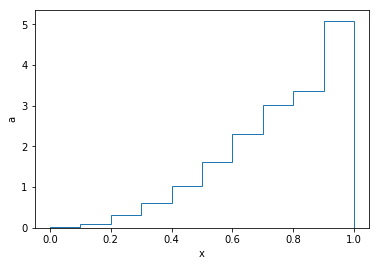

In [25]:
# or in one line
p.histogram('x').plot('a')

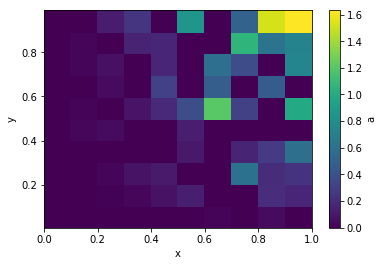

In [26]:
# we can also evaluate the histogram in different dimensions
p.histogram('x', 'y').plot('a', cbar=True)

get item 0
get item 0
get item 0
get item 0


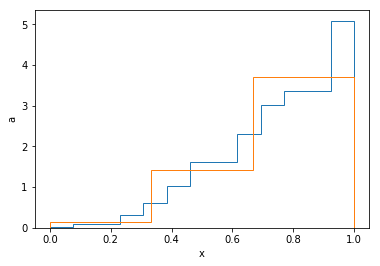

In [27]:


# we can also evaluate the histogram in different dimensions
g = p.histogram('x')
p.histogram('x').resample(x=13).plot('a')
p.histogram('x').resample(x=3).plot('a')


In [28]:
g['a']

x,"[0.00, 0.10]","[0.10, 0.20]","[0.20, 0.30]","[0.30, 0.40]","[0.40, 0.50]","[0.50, 0.60]","[0.60, 0.70]","[0.70, 0.80]","[0.80, 0.90]","[0.90, 1.00]"
a,0.02,0.10,0.32,0.61,1.02,1.61,2.29,3.02,3.35,5.09


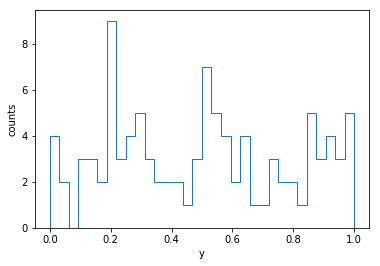

In [29]:
p.histogram(y=np.linspace(0,1,33)).plot('counts')

In [30]:
# the returned object is a GridData type
g = p.histogram(x=20)

In [31]:
# it has a grid defined
g

x,"[0.00, 0.05]","[0.05, 0.10]","[0.10, 0.15]","[0.15, 0.20]","[0.20, 0.25]","[0.25, 0.30]","[0.30, 0.35]","[0.35, 0.40]","[0.40, 0.45]","[0.45, 0.50]","[0.50, 0.55]","[0.55, 0.60]","[0.60, 0.65]","[0.65, 0.70]","[0.70, 0.75]","[0.75, 0.80]","[0.80, 0.85]","[0.85, 0.90]","[0.90, 0.95]","[0.95, 1.00]"
y,1.51,3.01,2.37,2.22,1.79,2.94,1.95,2.99,1.70,3.26,2.69,2.56,2.51,2.88,2.55,2.77,1.88,2.65,3.60,2.08
a,0.00,0.02,0.03,0.07,0.09,0.23,0.19,0.42,0.30,0.72,0.76,0.85,0.98,1.31,1.35,1.67,1.31,2.04,3.10,1.99
counts,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00
